In [5]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#데이터 시각화 + 패키지
import seaborn as sns
#통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#그래프 표시
%matplotlib inline

In [6]:
matplotlib.rc('font',family = 'Noto sans CJK JP')
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

In [137]:
# 실습문제 1
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x,mu,sigma)
print("나의 키가 180cm일 경우: {1:.1f}%".format(x,(1-prob)*100))

나의 키가 180cm일 경우: 15.9%


In [166]:
# 실습문제 2
mu = 12
sigma = 3
x1 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f} 에 해당함".format(mu,x1,(prob1-0.5)))
print("{0}km 이상 달릴 확률은  {1:.1f}%".format(x1,(1-prob)*100))

12km 이상 15km 이하를 달릴 확률은 0.341 에 해당함
15km 이상 달릴 확률은  15.9%


In [9]:
# 실습문제 3
t = 2.0
df = 100
prob = stats.t.cdf(t,df)
print("P(T<=t): {:.3f}".format(prob))

P(T<=t): 0.976


In [10]:
# 실습문제 4
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq,df)
print("P(X<={0}) : {1:.4f}".format(chisq,prob))

P(X<=3.0) : 0.0656


In [11]:
# 실습문제 5
f = 1.5
dfnum = 10
dfden = 100
prob = stats.f.cdf(x=f,dfn = dfnum, dfd = dfden)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.850


In [19]:
# 실습문제 6
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.3)
    print("P(X={0}): {1:.3f}".format(i,prob))
# 불량대수가 0대 나올 확률은 16.8%
# 불량대수가 1대 나올 확률은 36%
# 불량대수가 2대 나올 확률은 30.9%
# 불량대수가 3대 나올 확률은 13.2%
# 불량대수가 4대 나올 확률은 2.8%
# 불량대수가 5대 나올 확률은 0.2%
# 누적확률로 봤을 때 1~3대 정도 불량으로 나올 확률이 제일 높아서 공정의 불량률의 큰 원인을 찾아서 적어도 1대가 나올 확률을 높이고
# 다른 누적확률을 줄이는 것이 생산성에 있어서 효율적이라고 판단한다.

P(X=0): 0.168
P(X=1): 0.360
P(X=2): 0.309
P(X=3): 0.132
P(X=4): 0.028
P(X=5): 0.002


In [28]:
# 실습문제 7
df = pd.read_csv("/home/piai/문서/빅데이터분석실습/1 Big Data 분석 기초/2sample_t_test.csv")
df.head()
df = df.dropna()

In [31]:
statisticA,p = stats.shapiro(df['Mat_A'])
statisticB,p = stats.shapiro(df['Mat_B'])
print(statisticA,p)
print(statisticB,p)
# A와 B 모두 정규성을 만족하고 있다.

0.906264066696167 0.9169775247573853
0.9729753732681274 0.9169775247573853


In [168]:
# 실습문제 8
df = pd.DataFrame({"Potato" : [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df

,Potato
0,18
1,18
2,20
3,21
4,20
5,23
6,19
7,18
8,17
9,21


In [169]:
lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.38/np.sqrt(20))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))
# 감자 20Box의 무게는 평균적으로 19.33kg와 19.67kg 사이에 95%신뢰구간내에서 위치한다. 우리가 흔히 먹는 감자의 1개 무개는 250g정도이며 엄청나게 큰
# 차이는 아니지만 고객이 불편할 수도 있기 때문에 최대한 중량을 그 사이로 맞추도록 노력해야한다.

신뢰구간: ([19.33],[19.67])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [171]:
# 실습문제 9 
df = pd.DataFrame({'Coil' : [73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
df

,Coil
0,73
1,71
2,74
3,69
4,70
5,73
6,70
7,68
8,75
9,72


In [172]:
lower,upper = stats.t.interval(0.95,len(df)-1, loc = np.mean(df),scale = stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))
# 개발된 강종의 평균 인장강도가 유의수준 95%내에 70.6과 72.4에 위치하기 때문에 기대하고 있는 평균 인장강도 70kg를 만족했다고 볼 수 있다.

신뢰구간: ([70.6],[72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [47]:
# 실습문제 10
df = pd.DataFrame({'satisfaction': [85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
t_result = stats.ttest_1samp(df,78.0)
t, p = t_result.statistic.round(3),\
       t_result.pvalue.round(3)

In [48]:
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))
#귀무가설 : 개선활동이 고객만족도를 변화 시키지 않는다.
#대립가설 : 개선활동이 고객만족도를 변화 시킬수 있다.
# 유의수준 5%에서 검정결과 P값이 0.008이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 있다. 하지만 개선활동 자체는 올바르게 가고 있다
# 라고 생각해 볼 수 있는데 이 고객만족도의 변화 자체가 개선활동 때문에 변화되고 있다라고 즉각적인 판단은 올바르지 않다.

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


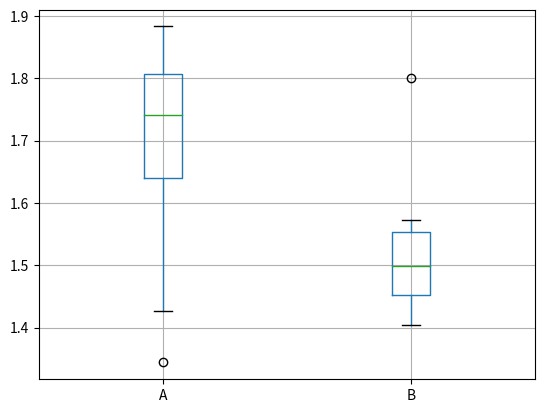

In [177]:
# 실습문제 11
df = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                   'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.800]})
df.boxplot(['A','B'])
plt.show()

In [178]:
statistic,p = stats.shapiro(df['A'])
print("statistic = {}, p-value = {}".format(statistic,p))

statistic = 0.8425754904747009, p-value = 0.08004532009363174


In [179]:
statistic,p = stats.shapiro(df['B'])
print("statistic = {}, p-value = {}".format(statistic,p))

# 데이터 모두 정규성을 만족하고 있음

statistic = 0.8393934369087219, p-value = 0.07424874603748322


In [180]:
stats.bartlett(df['A'],df['B'])
# 데이터는 등분산성을 만족하고 있다.

BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

In [181]:
t_result = stats.ttest_ind(df['A'],df['B'])
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))
# 귀무가설 : 공급자 간 모평균에 차이가 없다.
# 대립가설 : 공급자 간 모평균에 차이가 있다.
# 유의수준 5%에서 검정결과 값이 0.073이므로 공급자 간 모평균에 차이가 없다. 즉 공급자가 누구든 간 크게 데이터가 다르지 않다는 뜻을 의미한다.

2-Sample t-test
t:1.94
p:0.073


In [61]:
# 실습문제 12
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})
t_result = stats.ttest_rel(df1,df2)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

In [62]:
print("Paried t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 귀무가설 : 회사원들의 성적은 학원가기 전후와 차이가 없다.
# 대립가설 : 회사원들의 성적은 학원가기 전후와 차이가 있다.
# 유의수준 5%에서 검정결과 P값이 0.05이므로 회사원들의 성적은 학원가기 전후와 차이가 있다. 즉 회사원들을 학원에 보내는 것도 회사원들의
# 능률을 올릴 수 있고 회사의 성과에 많은 기여를 할 수 있을 것.

Paried t-test
t:[-2.266]
p:[0.05]


In [70]:
# 실습문제 13
count = 40
n_obs = 100
value = 0.5
z,p = proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))
# 귀무가설 : 동전은 정상적인 확률로 나온다.
# 대립가설 : 동전은 정상적인 확률로 나오지 않는다.
# 결론 : 유의수준 5%에서 p값은 0.041이므로 동전은 정상적인 확률로 나오지 않는다고 볼 수 있다. 일반적으로 동전은 두 면이 나올 확률은 5:5이기 때문에
# 정상적으로 나올려면 50%에 근접하게 나와야하는데 40%로 정상적이진 않다는 뜻을 의미한다.

1 Proportion test
z:-2.041
p:0.041


In [68]:
# 실습문제 14
count = np.array([14,5])
nobs = np.array([1200,1200])
z,p = proportions_ztest(count,nobs)
print("2 Proportion test")
print('z: {0:0.3f}'.format(z))
print('p: {0:0.3f}'.format(p))

# 귀무가설 : 두 공장의 불량률은 같지 않다.
# 대립가설 : 두 공장의 불량률은 같다
# 결론 : 유의수준 5%에서 p값은 0.038이므로 두 공장의 불량률은 같다고 할 수 있다
# 이 말 즉슨 불랑률로 선택하는 것보다 또 다른 비즈니스를 남겨줄 수 있는 공장을 선택하는 것이 좋다. 

2 Proportion test
z: 2.073
p: 0.038


In [67]:
# 실습문제 15
df = pd.DataFrame({'A' : [18,1,8,7,10,9,10], 'B' : [8,2,14,5,5,9,4],
                   'C' : [4,1,3,4,9,5,4], 'D' : [4,1,2,3,2,7,3],
                   'E' : [3,1,3,1,1,1,1], 'F' : [3,25,8,10,2,1,7]})
chi,pval,dof,expected = stats.chi2_contingency(df)

print("chi-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

# 귀무가설 : 각 제품에 대해 이미지에 대해서 차이가 없다
# 대립가설 : 각 제품에 대해 이미지에 대해서 차이가 있다
# 결론 : 유의수준 5%에서 p값은 0.000이므로 각 제품에 대해서 이미지에 대해 차이가 있다. 즉 답은 없으니
# 자신이 생각하는 우선순위를 꼽아서 그것에 부합하는 제품을 사는 것이 현명하다고 판단한다.

chi-square test
chisq:98.274
p:0.000
degree pf freedom : 30
expected value : 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


In [183]:
# 실습문제 16
df = pd.read_csv("/home/piai/문서/빅데이터분석실습/1 Big Data 분석 기초/ANOVA.csv",encoding = 'euc-kr')
df_g = pd.DataFrame({'A' : [32.2,30.4,33.6,36.4,33.9,34.9],
                    'B' : [33.1,29.9,31.7,27.5,34.0,30.7],
                    'C' : [32.6,32.7,29.3,25.9,31.1,23.8],
                    'D' : [26.7,28.5,30.9,26.2,32.3,23.7]})
df_t = pd.DataFrame({'A' : [32.2,30.4,33.6,36.4,33.9,34.9,33.1,29.9,31.7,27.5,34.0,30.7],
                     'B' : [32.6,32.7,29.3,25.9,31.1,23.8,26.7,28.5,30.9,26.2,32.3,23.7]})
print(df_g)
print(df_t)


      A     B     C     D
0  32.2  33.1  32.6  26.7
1  30.4  29.9  32.7  28.5
2  33.6  31.7  29.3  30.9
3  36.4  27.5  25.9  26.2
4  33.9  34.0  31.1  32.3
5  34.9  30.7  23.8  23.7
       A     B
0   32.2  32.6
1   30.4  32.7
2   33.6  29.3
3   36.4  25.9
4   33.9  31.1
5   34.9  23.8
6   33.1  26.7
7   29.9  28.5
8   31.7  30.9
9   27.5  26.2
10  34.0  32.3
11  30.7  23.7


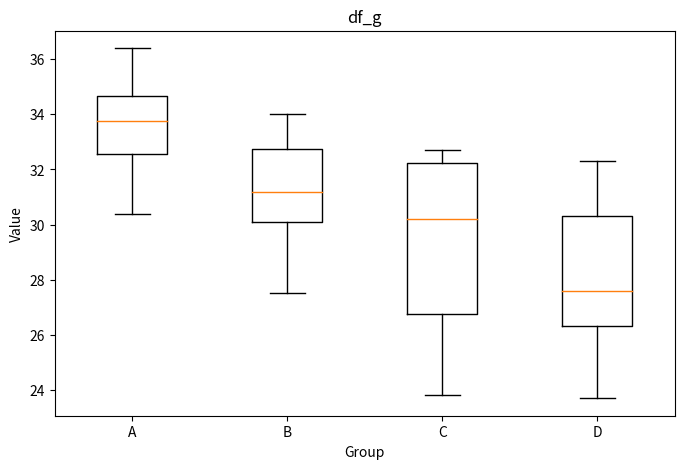

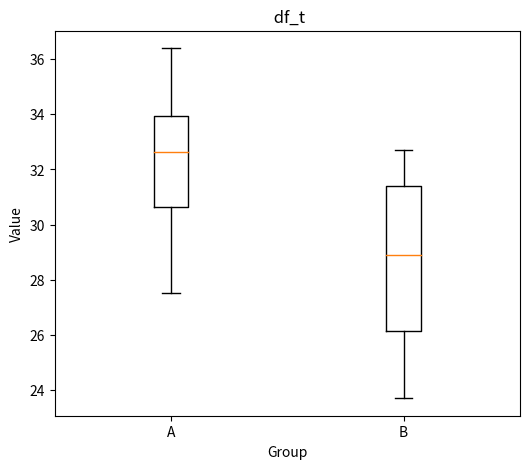

In [184]:
plt.figure(figsize=(8, 5))
plt.boxplot([df_g['A'], df_g['B'], df_g['C'], df_g['D']], labels=['A', 'B', 'C', 'D'])
plt.title('df_g')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(6, 5))
plt.boxplot([df_t['A'], df_t['B']], labels=['A', 'B'])
plt.title(' df_t')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [185]:
statistic,p = stats.shapiro(df_g['A'])
print("statistic = {}, p-value = {}".format(statistic,p))

statistic,p = stats.shapiro(df_g['B'])
print("statistic = {}, p-value = {}".format(statistic,p))

statistic,p = stats.shapiro(df_g['C'])
print("statistic = {}, p-value = {}".format(statistic,p))

statistic,p = stats.shapiro(df_g['D'])
print("statistic = {}, p-value = {}".format(statistic,p))
# 유의수준 5%내에서 df_g의 모든 데이터는 정규성을 만족하고 있다.

statistic = 0.9879403114318848, p-value = 0.983557939529419
statistic = 0.9769707918167114, p-value = 0.9355478286743164
statistic = 0.8929420113563538, p-value = 0.3338908553123474
statistic = 0.9713904857635498, p-value = 0.901641845703125


In [186]:
statistic,p = stats.shapiro(df_t['A'])
print("statistic = {}, p-value = {}".format(statistic,p))

statistic,p = stats.shapiro(df_t['B'])
print("statistic = {}, p-value = {}".format(statistic,p))
# 유의수준 5%내에서 df_t의 모든 데이터는 정규성을 만족하고 있다.

statistic = 0.982139527797699, p-value = 0.9907686114311218
statistic = 0.9098271131515503, p-value = 0.2122616022825241


In [187]:
stats.bartlett(df_g['A'],df_g['B'],df_g['C'],df_g['D'])
stats.bartlett(df_t['A'],df_g['B'])

BartlettResult(statistic=0.016899422383609006, pvalue=0.896568184372482)

In [188]:
df_g_result = stats.f_oneway(df_g['A'],df_g['B'],df_g['C'],df_g['D'])
df_t_result = stats.f_oneway(df_t['A'],df_t['B'])
f, p = df_g_result.statistic.round(3), df_g_result.pvalue.round(3)
g, h = df_t_result.statistic.round(3), df_t_result.pvalue.round(3)
#ANOVA의 f값 p값, g값 h값 저장

In [189]:
print("One-way ANOVA")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))
print("F 통계량: {}".format(g))
print("p-value: {}".format(h))
# (강)귀무가설 : 강종별로 2차 정련시간의 차이가 없다.
# (강)대립가설 : 강종별로 2차 정련시간의 차이가 있다.
# (type)귀무가설 : type별로 2차 정련시간에 차이가 없다.
# (type)대립가설 : type별로 2차 정련시간에 차이가 있다.
# 두 p값 모두 p값이 0.05이하이므로 강종과 type별로 2차 정련시간이 영향을 미친다는 것을 알 수 있다.

One-way ANOVA
F 통계량: 4.172
p-value: 0.019
F 통계량: 9.654
p-value: 0.005


In [190]:
# 실습문제 17
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr,pval = stats.pearsonr(df1,df2)

print("Correlation Analysis")
print('corr : {0:0.3f}'.format(corr))
print('p_value : {0:0.3f}'.format(pval))

# 결론 : 초코칩의 강도와 재료 반죽온도간에 0.7의 corr은 강한 상관성이 있다고 할 수 있다.

Correlation Analysis
corr : -0.723
p_value : 0.000
